# Table of contents 

### 1. Import Libraries 
### 2. Scrape data and create dataframe
### 3. Preprocess/clean text 
### 4. Data Analysis 

    i. Statistical Analysis
    
    ii. Sentiment Analysis 
    
    iii. Word Analysis
    
    iv. Emotional Analysis 

### 1. Import libraries 

In [1]:
from bs4 import BeautifulSoup
import requests 
import pandas as pd 
import numpy as np 
import json 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#preprocessing tools 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
nltk.download('omw-1.4')

import spacy
nlp = spacy.load("en_core_web_sm")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/wenboyang/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/Users/wenboyang/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pip install app_store_scraper

Note: you may need to restart the kernel to use updated packages.


In [3]:
from app_store_scraper import AppStore

In [4]:
#define path 
path = '/Users/wenboyang/Desktop/Data Analytics/Mental Health Apps/'

In [5]:
pd.set_option('display.max_rows', None)

### 2. Scrape data 

In [6]:
betterhelp = AppStore(country='us', app_name='betterhelp', app_id='995252384')

betterhelp.review(how_many=200)

2023-10-16 12:42:34,420 [INFO] Base - Initialised: AppStore('us', 'betterhelp', 995252384)
2023-10-16 12:42:34,422 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/betterhelp/id995252384
2023-10-16 12:42:37,114 [INFO] Base - [id:995252384] Fetched 200 reviews (200 fetched in total)


In [7]:
#convert data to dataframe structure 
bhelpdf = pd.DataFrame(np.array(betterhelp.reviews),columns=['review'])
bhelpdf2 = bhelpdf.join(pd.DataFrame(bhelpdf.pop('review').tolist()))

#add app name column 
bhelpdf2.insert(0, 'app', 'Betterhelp')

bhelpdf2.head()

app                date  \
0  Betterhelp 2022-07-07 02:07:58   
1  Betterhelp 2023-09-14 22:16:29   
2  Betterhelp 2021-05-12 23:57:19   
3  Betterhelp 2021-11-09 15:52:39   
4  Betterhelp 2023-05-22 14:44:35   

                                              review  rating  isEdited  \
0  This is the perfect therapy for me. I am a bus...       5     False   
1  This has been a huge help with not only connec...       5     False   
2  I’d been putting off finding a therapist becau...       5     False   
3  I appreciate this company and their support ha...       5     False   
4  I have been using better help for over a year ...       5     False   

         userName                                              title  \
0    baileysmith7                                               Love   
1          CNGJCG  Great option for someone with a busy work sche...   
2         essdogg                        Only wish I’d joined sooner   
3  Tiffany J. Kim  You Need to Keep Searching To Find Your Clinician   
4       Melanie 👑                                     Simply amazing   

                                   developerResponse  
0                                                NaN  
1                                                NaN  
2  {'id': 35897874, 'body': 'Hey essdogg,
My name...  
3                                                NaN  
4                                                NaN

In [8]:
headspace = AppStore(country='us', app_name='headspace', app_id='493145008')
headspace.review(how_many=200)

2023-10-16 12:42:38,427 [INFO] Base - Initialised: AppStore('us', 'headspace', 493145008)
2023-10-16 12:42:38,429 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/headspace/id493145008
2023-10-16 12:42:41,204 [INFO] Base - [id:493145008] Fetched 200 reviews (200 fetched in total)


In [9]:
headspace.reviews

[{'date': datetime.datetime(2023, 4, 11, 16, 57, 43),
  'review': 'The app that I chose to review is called Headspace, and it is a meditation app that helps manage stress by showing mindfulness excercises, and offers information on how to manage other things such as anxiety or worry. This app did an amazing job at helping me be more mindful throughout the day. In the "Headspace library", there were tabs for certain scenarios like "navigating injustice, reframe stress and relax, mindful money, anger/sadness/growth, mindful eating, and guide to sleep,". Each tab had different podcasts and meditation methods that corresponded to that subject. I enjoyed using this app because as a person who worries often, this tool allowed me to take time out of my day to clear my head and do something that betters my mental health. This app is relevant to abnormal psychology because it includes ways to manage anxiety and worry. Although it is not an app that diagnoses or properly treats symptoms of anxie

In [10]:
#convert data to dataframe 
headspacedf = pd.DataFrame(np.array(headspace.reviews),columns=['review'])
headspacedf2 = headspacedf.join(pd.DataFrame(headspacedf.pop('review').tolist()))

#add app name column 
headspacedf2.insert(0, 'app', 'Headspace')

headspacedf2.head()

app                date  \
0  Headspace 2023-04-11 16:57:43   
1  Headspace 2022-10-24 16:00:47   
2  Headspace 2021-08-08 13:26:01   
3  Headspace 2022-10-16 23:56:57   
4  Headspace 2021-08-03 16:26:06   

                                              review  rating  isEdited  \
0  The app that I chose to review is called Heads...       5     False   
1  The best mindfulness app. User friendly, the m...       5     False   
2  I began using this application a few years bac...       5     False   
3  I have use this app for several days I have ta...       4     False   
4  I was introduced to meditation more than 25 ye...       5     False   

                                               title                 userName  \
0                         This is a very useful app!                  Kaysoph   
1                          An Absolute  Life Changer          Debbieamy112495   
2                     Head Space, The Final Frontier            Piclover56531   
3  Compared to what I have learned in my PSY classes  asndnsjsjfjansndbajxjsn   
4                    Support for seasoned meditators                Zorayda M   

  developerResponse  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [11]:
#define column order 
order = ['app','date', 'review', 'rating','isEdited','userName','title','developerResponse']

headspacedf2 = headspacedf2[order]

#print
headspacedf2.head()

app                date  \
0  Headspace 2023-04-11 16:57:43   
1  Headspace 2022-10-24 16:00:47   
2  Headspace 2021-08-08 13:26:01   
3  Headspace 2022-10-16 23:56:57   
4  Headspace 2021-08-03 16:26:06   

                                              review  rating  isEdited  \
0  The app that I chose to review is called Heads...       5     False   
1  The best mindfulness app. User friendly, the m...       5     False   
2  I began using this application a few years bac...       5     False   
3  I have use this app for several days I have ta...       4     False   
4  I was introduced to meditation more than 25 ye...       5     False   

                  userName                                              title  \
0                  Kaysoph                         This is a very useful app!   
1          Debbieamy112495                          An Absolute  Life Changer   
2            Piclover56531                     Head Space, The Final Frontier   
3  asndnsjsjfjansndbajxjsn  Compared to what I have learned in my PSY classes   
4                Zorayda M                    Support for seasoned meditators   

  developerResponse  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [12]:
talkspace = AppStore(country='us', app_name='talkspace', app_id='661829386')
talkspace.review(how_many=100)

2023-10-16 12:42:42,220 [INFO] Base - Initialised: AppStore('us', 'talkspace', 661829386)
2023-10-16 12:42:42,222 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/talkspace/id661829386
2023-10-16 12:42:43,070 [INFO] Base - [id:661829386] Fetched 100 reviews (100 fetched in total)


In [13]:
#convert data to dataframe structure 
talkspacedf = pd.DataFrame(np.array(talkspace.reviews),columns=['review'])
talkspacedf2 = talkspacedf.join(pd.DataFrame(talkspacedf.pop('review').tolist()))

#add app name column 
talkspacedf2.insert(0, 'app', 'Talkspace')

talkspacedf2.head()

app                date  \
0  Talkspace 2023-03-24 13:57:21   
1  Talkspace 2023-07-30 00:11:47   
2  Talkspace 2021-10-29 13:00:33   
3  Talkspace 2022-09-04 04:21:35   
4  Talkspace 2022-07-16 21:55:23   

                                   developerResponse  \
0  {'id': 35679151, 'body': 'Hi there, I am happy...   
1  {'id': 37956149, 'body': 'Hi there, I'm sorry ...   
2  {'id': 26038969, 'body': 'Hi there, thank you ...   
3                                                NaN   
4  {'id': 31245773, 'body': 'Hi there, thank you ...   

                                              review  rating  isEdited  \
0  I will start by saying that I have been with m...       4     False   
1  I wasn’t very impressed, both with the therapi...       4      True   
2  Give me all of my money back. I don’t write ap...       1     False   
3  What an absolute nightmare. I can’t recommend ...       1     False   
4  I was initially matched with a therapist that ...       2     False   

      userName                          title  
0   Paris51690          A few critical issues  
1     Bouch620                  Not impressed  
2  texasbaby27               Refund. Me. Now.  
3      llucidd  Nightmare and Robbery. AVOID.  
4      gradele         Extremely disappointed

In [14]:
# Reorder the columns
talkspacedf2 = talkspacedf2[order]

#print df
talkspacedf2.head()

app                date  \
0  Talkspace 2023-03-24 13:57:21   
1  Talkspace 2023-07-30 00:11:47   
2  Talkspace 2021-10-29 13:00:33   
3  Talkspace 2022-09-04 04:21:35   
4  Talkspace 2022-07-16 21:55:23   

                                              review  rating  isEdited  \
0  I will start by saying that I have been with m...       4     False   
1  I wasn’t very impressed, both with the therapi...       4      True   
2  Give me all of my money back. I don’t write ap...       1     False   
3  What an absolute nightmare. I can’t recommend ...       1     False   
4  I was initially matched with a therapist that ...       2     False   

      userName                          title  \
0   Paris51690          A few critical issues   
1     Bouch620                  Not impressed   
2  texasbaby27               Refund. Me. Now.   
3      llucidd  Nightmare and Robbery. AVOID.   
4      gradele         Extremely disappointed   

                                   developerResponse  
0  {'id': 35679151, 'body': 'Hi there, I am happy...  
1  {'id': 37956149, 'body': 'Hi there, I'm sorry ...  
2  {'id': 26038969, 'body': 'Hi there, thank you ...  
3                                                NaN  
4  {'id': 31245773, 'body': 'Hi there, thank you ...

In [15]:
sanvello = AppStore(country='us', app_name='sanvello', app_id='922968861')
sanvello.review(how_many=100)

2023-10-16 12:42:43,962 [INFO] Base - Initialised: AppStore('us', 'sanvello', 922968861)
2023-10-16 12:42:43,964 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/sanvello/id922968861
2023-10-16 12:42:44,788 [INFO] Base - [id:922968861] Fetched 100 reviews (100 fetched in total)


In [16]:
#convert data to dataframe structure
sanvdf = pd.DataFrame(np.array(sanvello.reviews),columns=['review'])
sanvdf2 = sanvdf.join(pd.DataFrame(sanvdf.pop('review').tolist()))

#add app name column 
sanvdf2.insert(0, 'app', 'Sanvello')

sanvdf2.head()

app                date  \
0  Sanvello 2019-03-22 18:26:44   
1  Sanvello 2020-07-02 04:31:57   
2  Sanvello 2017-10-22 16:11:59   
3  Sanvello 2018-03-15 04:12:07   
4  Sanvello 2021-10-23 00:22:16   

                                              review  rating  isEdited  \
0  Pacifica, especially the premium version, has ...       5     False   
1  This app is nice to have to keep track of your...       4     False   
2  This app is amazing if you want to be able to ...       5     False   
3  I Came Across This App While Reading a Magazin...       5     False   
4  I like the concept of this app and it helps in...       3     False   

           userName                                  title  \
0           Reisa S   Invaluable Tool, Constantly Evolving   
1        MoMo220011                     overall a good app   
2          Makeup b  I feel like I can actually get better   
3  HEISMYREASON3012        CHANGE & HEALING BEGINS HERE...   
4      ms veganista         Hard for me to understand this   

                                   developerResponse  
0                                                NaN  
1  {'id': 16835143, 'body': 'Thank you so much fo...  
2  {'id': 1564547, 'body': 'Thank you for the kin...  
3                                                NaN  
4  {'id': 25886140, 'body': 'Thanks for your revi...

In [17]:
#combine dataframes 
combined_df = bhelpdf2.append([headspacedf2, talkspacedf2, sanvdf2], ignore_index=True)
combined_df.head()

/var/folders/20/3s6zmhss18nbx0rx80bwxh4r0000gn/T/ipykernel_8726/1648693255.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = bhelpdf2.append([headspacedf2, talkspacedf2, sanvdf2], ignore_index=True)


app                date  \
0  Betterhelp 2022-07-07 02:07:58   
1  Betterhelp 2023-09-14 22:16:29   
2  Betterhelp 2021-05-12 23:57:19   
3  Betterhelp 2021-11-09 15:52:39   
4  Betterhelp 2023-05-22 14:44:35   

                                              review  rating  isEdited  \
0  This is the perfect therapy for me. I am a bus...       5     False   
1  This has been a huge help with not only connec...       5     False   
2  I’d been putting off finding a therapist becau...       5     False   
3  I appreciate this company and their support ha...       5     False   
4  I have been using better help for over a year ...       5     False   

         userName                                              title  \
0    baileysmith7                                               Love   
1          CNGJCG  Great option for someone with a busy work sche...   
2         essdogg                        Only wish I’d joined sooner   
3  Tiffany J. Kim  You Need to Keep Searching To Find Your Clinician   
4       Melanie 👑                                     Simply amazing   

                                   developerResponse  
0                                                NaN  
1                                                NaN  
2  {'id': 35897874, 'body': 'Hey essdogg,
My name...  
3                                                NaN  
4                                                NaN

### 3. Perform Text Preprocessing

In [18]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/wenboyang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/wenboyang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wenboyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
# Remove punctuation, numbers, and convert to lowercase
combined_df['cleaned_text'] = combined_df['review'].str.replace('[^a-zA-Z\s]', '').str.lower()

# Tokenize text
combined_df['tokenized_text'] = combined_df['cleaned_text'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
combined_df['filtered_text'] = combined_df['tokenized_text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
combined_df['lemmatized_text'] = combined_df['filtered_text'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

/var/folders/20/3s6zmhss18nbx0rx80bwxh4r0000gn/T/ipykernel_8726/168689488.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  combined_df['cleaned_text'] = combined_df['review'].str.replace('[^a-zA-Z\s]', '').str.lower()


In [20]:
combined_df.head()

app                date  \
0  Betterhelp 2022-07-07 02:07:58   
1  Betterhelp 2023-09-14 22:16:29   
2  Betterhelp 2021-05-12 23:57:19   
3  Betterhelp 2021-11-09 15:52:39   
4  Betterhelp 2023-05-22 14:44:35   

                                              review  rating  isEdited  \
0  This is the perfect therapy for me. I am a bus...       5     False   
1  This has been a huge help with not only connec...       5     False   
2  I’d been putting off finding a therapist becau...       5     False   
3  I appreciate this company and their support ha...       5     False   
4  I have been using better help for over a year ...       5     False   

         userName                                              title  \
0    baileysmith7                                               Love   
1          CNGJCG  Great option for someone with a busy work sche...   
2         essdogg                        Only wish I’d joined sooner   
3  Tiffany J. Kim  You Need to Keep Searching To Find Your Clinician   
4       Melanie 👑                                     Simply amazing   

                                   developerResponse  \
0                                                NaN   
1                                                NaN   
2  {'id': 35897874, 'body': 'Hey essdogg,
My name...   
3                                                NaN   
4                                                NaN   

                                        cleaned_text  \
0  this is the perfect therapy for me i am a busy...   
1  this has been a huge help with not only connec...   
2  id been putting off finding a therapist becaus...   
3  i appreciate this company and their support ha...   
4  i have been using better help for over a year ...   

                                      tokenized_text  \
0  [this, is, the, perfect, therapy, for, me, i, ...   
1  [this, has, been, a, huge, help, with, not, on...   
2  [id, been, putting, off, finding, a, therapist...   
3  [i, appreciate, this, company, and, their, sup...   
4  [i, have, been, using, better, help, for, over...   

                                       filtered_text  \
0  [perfect, therapy, busy, person, balance, work...   
1  [huge, help, connecting, high, trained, therap...   
2  [id, putting, finding, therapist, sifting, loc...   
3  [appreciate, company, support, great, trying, ...   
4  [using, better, help, year, first, let, say, t...   

                                     lemmatized_text  
0  [perfect, therapy, busy, person, balance, work...  
1  [huge, help, connecting, high, trained, therap...  
2  [id, putting, finding, therapist, sifting, loc...  
3  [appreciate, company, support, great, trying, ...  
4  [using, better, help, year, first, let, say, t...

In [21]:
# Drop rows with missing 'lemmatized_text'
combined_df = combined_df.dropna(subset=['lemmatized_text'])

### 4. Data Analysis 

### i. Get Summary Statistics

In [22]:
# Group by 'app_name' and calculate summary statistics
summary_stats = combined_df.groupby('app').agg({
    'rating': ['mean', 'std', 'min', 'max']
})

In [23]:
summary_stats

rating                  
             mean       std min max
app                                
Betterhelp   4.33  1.315199   1   5
Headspace    4.50  1.012485   1   5
Sanvello     4.27  1.221483   1   5
Talkspace    1.39  0.863339   1   5

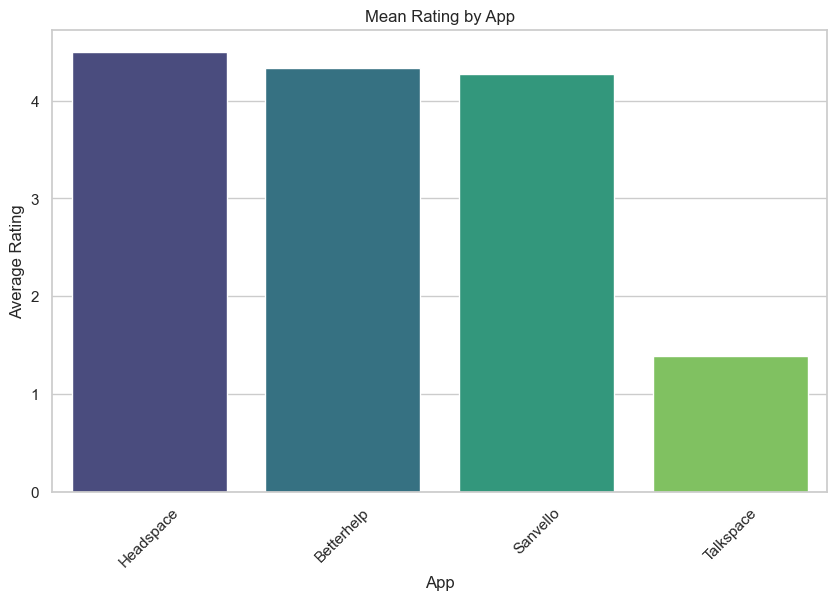

In [99]:
# Group the data by 'app_name' and calculate the mean of 'compound_sentiment'
grouped_data = combined_df.groupby('app')['rating'].mean().reset_index()

# Sort the data by 'rating' in descending order
grouped_data = grouped_data.sort_values(by='rating', ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(y='rating', x='app', data=grouped_data, palette='viridis')
plt.ylabel('Average Rating')
plt.xlabel('App')
plt.title('Mean Rating by App')
plt.xticks(rotation=45)
plt.show()

### ii. Conduct sentiment analysis 

In [25]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re

# Download the VADER lexicon if you haven't already
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/wenboyang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [26]:
print(combined_df['lemmatized_text'])

0      [perfect, therapy, busy, person, balance, work...
1      [huge, help, connecting, high, trained, therap...
2      [id, putting, finding, therapist, sifting, loc...
3      [appreciate, company, support, great, trying, ...
4      [using, better, help, year, first, let, say, t...
5      [started, using, betterhelp, week, ago, really...
6      [using, better, help, month, loving, finding, ...
7      [first, experience, going, therapyseeing, coun...
8      [pretty, apprehensive, finally, decided, try, ...
9      [hesitant, actually, start, one, therapist, la...
10     [little, skeptical, first, friend, used, bette...
11     [wonderful, app, especially, unprecedented, ti...
12     [app, great, since, live, abroad, want, talk, ...
13     [know, people, issue, counselor, hopping, find...
14     [hello, people, need, someone, genuine, care, ...
15     [like, therapist, helpful, however, mobile, ap...
16     [really, like, flexibility, service, especiall...
17     [genuinely, believe, hel

In [27]:
# Convert the 'lemmatized_text' column to strings
combined_df['lemmatized_text'] = combined_df['lemmatized_text'].apply(lambda x: ' '.join(x))

# Replace commas with spaces
combined_df['lemmatized_text'] = combined_df['lemmatized_text'].str.replace(',', ' ')

In [28]:
# Create a new column for sentiment scores
combined_df['sentiment_scores'] = combined_df['lemmatized_text'].apply(lambda x: sid.polarity_scores(x))

# Extract the sentiment polarity score
combined_df['sentiment_polarity'] = combined_df['sentiment_scores'].apply(lambda x: x['compound'])  # Use 'compound' for polarity

# Now, 'sentiment_polarity' column contains the sentiment polarity score for each review

# Display the DataFrame with sentiment scores
print(combined_df[['lemmatized_text', 'sentiment_polarity']])

                                       lemmatized_text  sentiment_polarity
0    perfect therapy busy person balance work full ...              0.9912
1    huge help connecting high trained therapist pe...              0.9799
2    id putting finding therapist sifting local rec...              0.9895
3    appreciate company support great trying talksp...              0.9901
4    using better help year first let say therapist...              0.9826
5    started using betterhelp week ago really rough...              0.9809
6    using better help month loving finding highly ...              0.9962
7    first experience going therapyseeing counselor...              0.9821
8    pretty apprehensive finally decided try online...              0.9882
9    hesitant actually start one therapist lasted s...              0.7041
10   little skeptical first friend used better help...              0.9955
11   wonderful app especially unprecedented time gr...              0.9859
12   app great since live

Create sentiment graph 

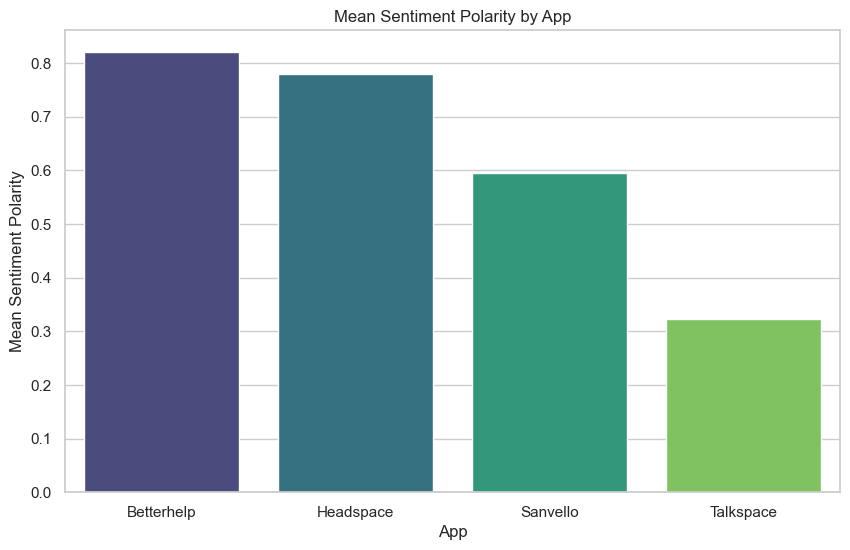

In [107]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a barplot to visualize sentiment scores for each app
plt.figure(figsize=(10, 6))
sns.barplot(x=app_sentiment['app'], y=app_sentiment['sentiment_polarity'], palette='viridis')
plt.xlabel('App')
plt.ylabel('Mean Sentiment Polarity')
plt.title('Mean Sentiment Polarity by App')
plt.show()

### iii. Common Words 

In [31]:
# Combine all titles into one string per app
combined_df['title'] = combined_df['title'].str.lower()  # Convert to lowercase
grouped_titles = combined_df.groupby('app')['title'].apply(' '.join)

# Tokenize the titles using regular expressions to remove punctuation
common_words_by_app = {}

for app, titles in grouped_titles.items():
    words = re.findall(r'\b\w+\b', titles)  # Use regex to find words

    # Remove stopwords (optional)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Get the frequency distribution of words
    freq_dist = FreqDist(words)

    # Get the N most common words
    N = 10  # Change N to get the desired number of common words
    common_words = freq_dist.most_common(N)

    common_words_by_app[app] = common_words

# Print the common words for each app
for app, words in common_words_by_app.items():
    print(f"Most common words for {app}: {words}")

Most common words for Betterhelp: [('great', 28), ('therapy', 18), ('better', 17), ('betterhelp', 17), ('app', 14), ('help', 13), ('helpful', 12), ('amazing', 11), ('therapist', 10), ('service', 9)]
Most common words for Headspace: [('app', 43), ('life', 24), ('great', 17), ('headspace', 13), ('changing', 12), ('meditation', 12), ('love', 10), ('amazing', 9), ('best', 9), ('good', 8)]
Most common words for Sanvello: [('app', 22), ('great', 14), ('amazing', 6), ('best', 6), ('love', 6), ('life', 6), ('mental', 5), ('helpful', 5), ('health', 4), ('changing', 4)]
Most common words for Talkspace: [('service', 10), ('disappointed', 6), ('terrible', 6), ('support', 6), ('money', 6), ('waste', 5), ('time', 5), ('scam', 5), ('app', 5), ('therapy', 5)]


In [32]:
# Convert the common_words_by_app dictionary to a DataFrame
data = []

for app, words in common_words_by_app.items():
    for word, count in words:
        data.append([app, word, count])

df = pd.DataFrame(data, columns=['App', 'Word', 'Count'])

# Display the DataFrame
print(df)

           App          Word  Count
0   Betterhelp         great     28
1   Betterhelp       therapy     18
2   Betterhelp        better     17
3   Betterhelp    betterhelp     17
4   Betterhelp           app     14
5   Betterhelp          help     13
6   Betterhelp       helpful     12
7   Betterhelp       amazing     11
8   Betterhelp     therapist     10
9   Betterhelp       service      9
10   Headspace           app     43
11   Headspace          life     24
12   Headspace         great     17
13   Headspace     headspace     13
14   Headspace      changing     12
15   Headspace    meditation     12
16   Headspace          love     10
17   Headspace       amazing      9
18   Headspace          best      9
19   Headspace          good      8
20    Sanvello           app     22
21    Sanvello         great     14
22    Sanvello       amazing      6
23    Sanvello          best      6
24    Sanvello          love      6
25    Sanvello          life      6
26    Sanvello        mental

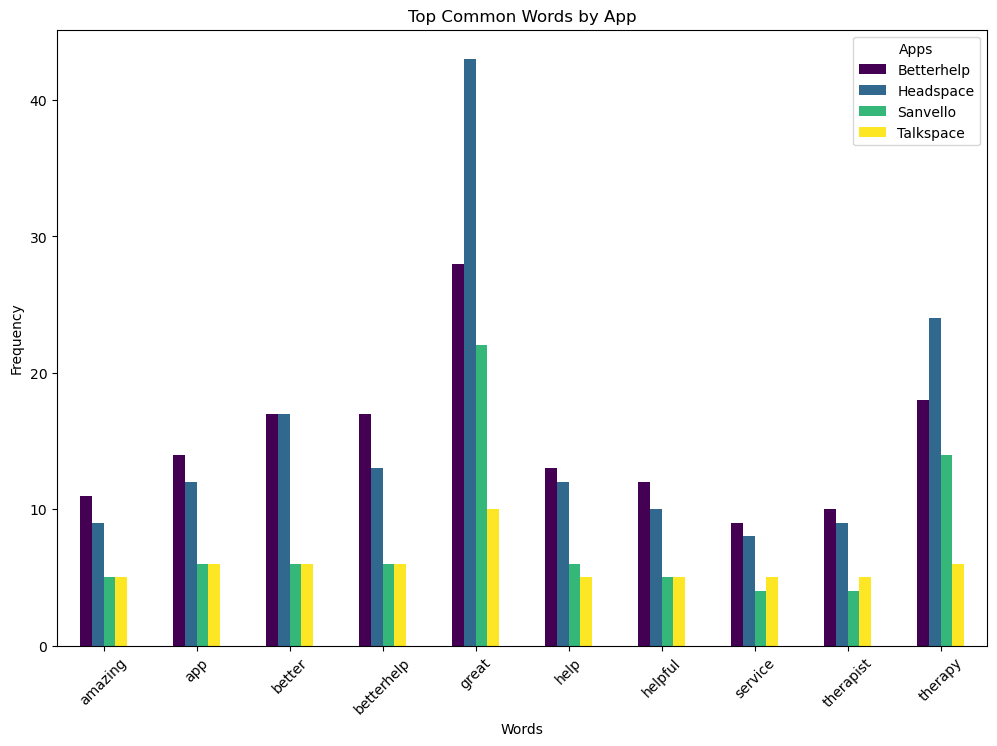

In [33]:
# Create a DataFrame from the provided data
data = {
    'App': ['Betterhelp']*10 + ['Headspace']*10 + ['Sanvello']*10 + ['Talkspace']*10,
    'Word': ['great', 'therapy', 'better', 'betterhelp', 'app', 'help', 'helpful', 'amazing', 'therapist', 'service']*4,
    'Count': [28, 18, 17, 17, 14, 13, 12, 11, 10, 9, 43, 24, 17, 13, 12, 12, 10, 9, 9, 8, 22, 14, 6, 6, 6, 6, 5, 5, 4, 4, 10, 6, 6, 6, 6, 5, 5, 5, 5, 5]
}

df = pd.DataFrame(data)

# Pivot the DataFrame for easy plotting
pivot_df = df.pivot(index='Word', columns='App', values='Count').fillna(0)

# Plot grouped bar chart
ax = pivot_df.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Common Words by App')
plt.xticks(rotation=45)
plt.legend(title='Apps')
plt.show()

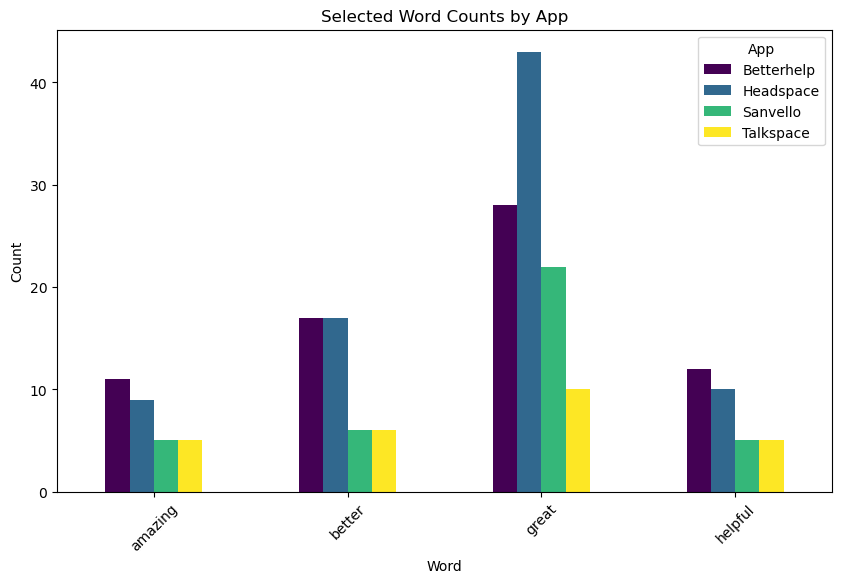

In [34]:
# Create a DataFrame with the provided data
data = {
    'App': ['Betterhelp', 'Betterhelp', 'Betterhelp', 'Betterhelp', 'Betterhelp', 'Betterhelp', 'Betterhelp', 'Betterhelp', 'Betterhelp', 'Betterhelp',
            'Headspace', 'Headspace', 'Headspace', 'Headspace', 'Headspace', 'Headspace', 'Headspace', 'Headspace', 'Headspace', 'Headspace',
            'Sanvello', 'Sanvello', 'Sanvello', 'Sanvello', 'Sanvello', 'Sanvello', 'Sanvello', 'Sanvello', 'Sanvello', 'Sanvello',
            'Talkspace', 'Talkspace', 'Talkspace', 'Talkspace', 'Talkspace', 'Talkspace', 'Talkspace', 'Talkspace', 'Talkspace', 'Talkspace'],
    'Word': ['great', 'therapy', 'better', 'betterhelp', 'app', 'help', 'helpful', 'amazing', 'therapist', 'service',
             'app', 'life', 'great', 'headspace', 'changing', 'meditation', 'love', 'amazing', 'best', 'good',
             'app', 'great', 'amazing', 'best', 'love', 'life', 'mental', 'helpful', 'health', 'changing',
             'service', 'disappointed', 'terrible', 'support', 'money', 'waste', 'time', 'scam', 'app', 'therapy'],
    'Count': [28, 18, 17, 17, 14, 13, 12, 11, 10, 9,
              43, 24, 17, 13, 12, 12, 10, 9, 9, 8,
              22, 14, 6, 6, 6, 6, 5, 5, 4, 4,
              10, 6, 6, 6, 6, 5, 5, 5, 5, 5]
}

# Filter for the selected words
selected_words = ['great', 'better','best','helpful', 'changing', 'amazing', 'love', 'disappointed', 'terrible', 'waste', 'scam']
filtered_df = df[df['Word'].isin(selected_words)]

# Pivot the DataFrame for plotting
pivot_df = filtered_df.pivot(index='Word', columns='App', values='Count').fillna(0)

# Plotting with Viridis colormap
pivot_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Selected Word Counts by App')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='App')
plt.show()

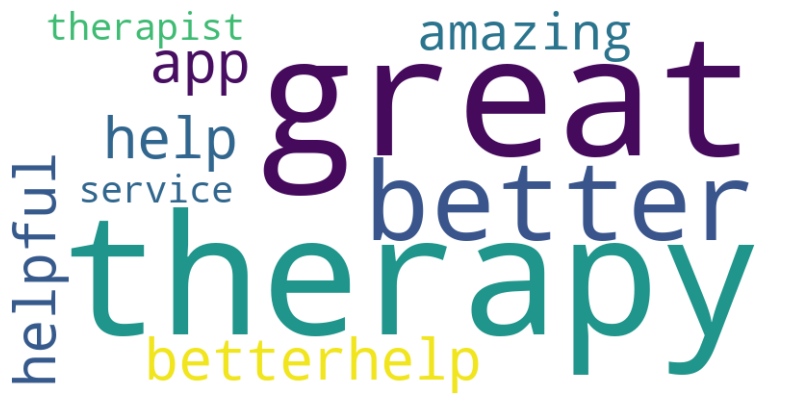

In [35]:
# Combine all words into a single string
all_words = ' '.join(df['Word'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_words)



# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

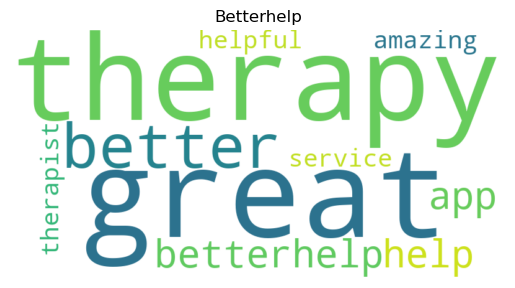

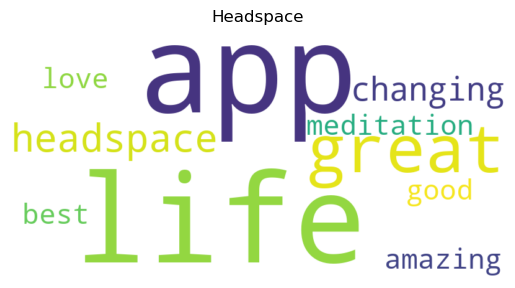

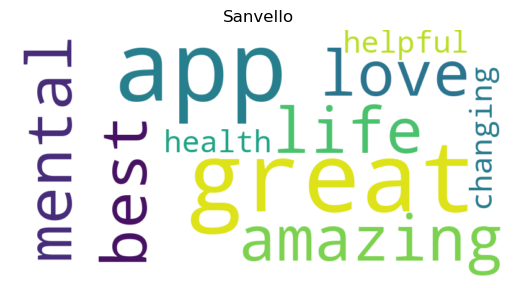

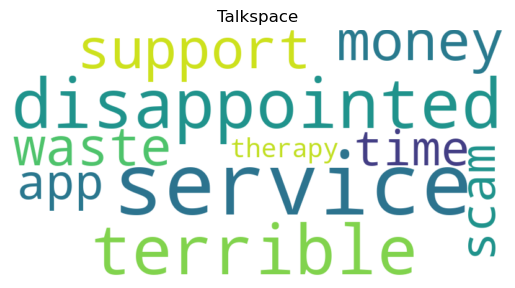

In [36]:
# Create a DataFrame
df = pd.DataFrame(data)

# Get unique apps
apps = df['App'].unique()

# Generate and save word clouds for each app
for app in apps:
    # Filter data for the specific app
    app_data = df[df['App'] == app]
    
    # Generate the word cloud
    text = ' '.join(app_data['Word'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Save the word cloud as JPEG
    file_path = f'{app}_wordcloud.jpg'
    wordcloud.to_file(file_path)
    
    # Optionally, display the word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{app}')
    plt.axis('off')
    plt.show()

### iv. Emotional Analysis 

In [56]:
# Define the file path
file_path = '/Users/wenboyang/Desktop/Data Analytics/Mental Health Apps Analysis /NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'

# Load the NRC Emotion Lexicon
with open(file_path, 'r') as file:
    lines = file.readlines()

# Create a dictionary mapping words to their associated emotions
word_emotion_dict = {}
for line in lines:
    word, emotion, value = line.strip().split('\t')
    if int(value) == 1:
        if word not in word_emotion_dict:
            word_emotion_dict[word] = []
        word_emotion_dict[word].append(emotion)

In [47]:
# Define a function to perform emotional analysis
def analyze_emotion(text):
    emotions = []
    for word in text.split():
        if word in word_emotion_dict:
            emotions.extend(word_emotion_dict[word])
    return emotions

# Apply the emotional analysis to the 'lemmatized_text' column
combined_df['emotions'] = combined_df['lemmatized_text'].apply(analyze_emotion)

# Group the results by 'App'
app_emotions = combined_df.groupby('app')['emotions'].sum().reset_index()

In [57]:
app_emotions

app                                           emotions
0  Betterhelp  [anticipation, joy, positive, trust, positive,...
1   Headspace  [positive, trust, negative, positive, positive...
2    Sanvello  [positive, anticipation, positive, anticipatio...
3   Talkspace  [anticipation, anticipation, anticipation, neg...

In [76]:
# Count the occurrences of each emotion for each app
app_emotion_counts = app_emotions['emotions'].apply(lambda x: pd.Series(x)).stack().value_counts().reset_index()
app_emotion_counts.columns = ['Emotion', 'Count']

In [78]:
# Assuming 'app_emotions' DataFrame has an 'App' column and 'emotions' column
app_emotion_counts = app_emotions.apply(lambda row: pd.Series(row['emotions']).value_counts(), axis=1).fillna(0)

# Add the 'App' column to the DataFrame
app_emotion_counts['app'] = app_emotions['app']

# Melt the DataFrame to have Emotion, Count, and App as separate columns
app_emotion_counts_melted = app_emotion_counts.melt(id_vars=['app'], var_name='Emotion', value_name='Count')

# Now, 'app_emotion_counts_melted' DataFrame has Emotion, Count, and App columns

In [79]:
app_emotion_counts_melted

app       Emotion  Count
0   Betterhelp         anger    340
1    Headspace         anger    425
2     Sanvello         anger    221
3    Talkspace         anger    207
4   Betterhelp  anticipation   1097
5    Headspace  anticipation   1175
6     Sanvello  anticipation    555
7    Talkspace  anticipation    394
8   Betterhelp       disgust    204
9    Headspace       disgust    221
10    Sanvello       disgust    102
11   Talkspace       disgust    134
12  Betterhelp          fear    469
13   Headspace          fear    554
14    Sanvello          fear    311
15   Talkspace          fear    176
16  Betterhelp           joy    866
17   Headspace           joy    909
18    Sanvello           joy    366
19   Talkspace           joy    222
20  Betterhelp      negative    804
21   Headspace      negative    964
22    Sanvello      negative    457
23   Talkspace      negative    427
24  Betterhelp      positive   2234
25   Headspace      positive   2211
26    Sanvello      positive    840
27   Talkspace      positive    703
28  Betterhelp       sadness    473
29   Headspace       sadness    617
30    Sanvello       sadness    287
31   Talkspace       sadness    226
32  Betterhelp      surprise    349
33   Headspace      surprise    327
34    Sanvello      surprise    167
35   Talkspace      surprise    140
36  Betterhelp         trust   1360
37   Headspace         trust   1173
38    Sanvello         trust    473
39   Talkspace         trust    445

In [77]:
app_emotion_counts

Emotion  Count
0      positive   5988
1         trust   3451
2  anticipation   3221
3      negative   2652
4           joy   2363
5       sadness   1603
6          fear   1510
7         anger   1193
8      surprise    983
9       disgust    661

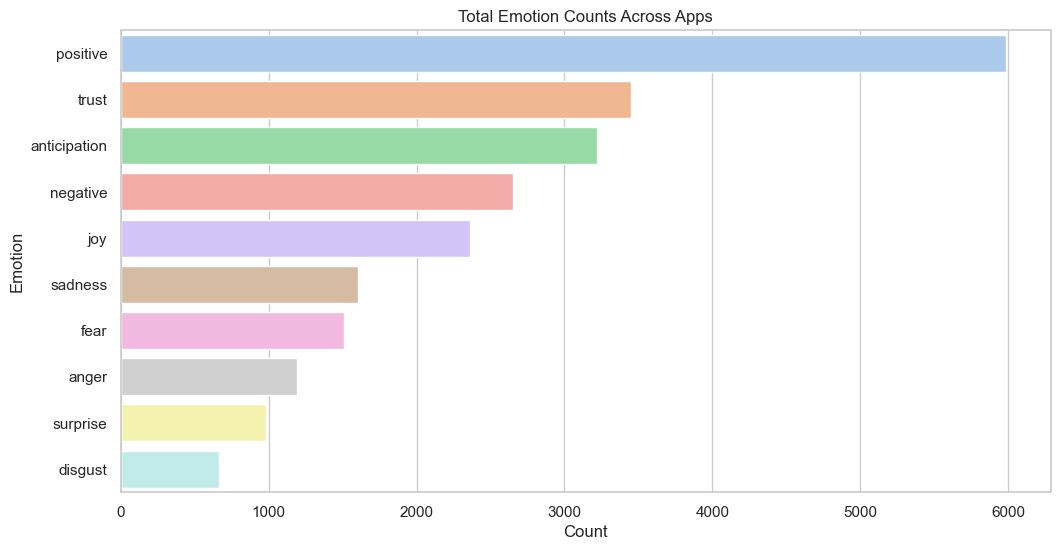

In [90]:
# Calculate total emotion counts across all apps
total_emotion_counts = app_emotion_counts_melted.groupby('Emotion')['Count'].sum().reset_index()

# Sort the DataFrame by counts in descending order
total_emotion_counts = total_emotion_counts.sort_values(by='Count', ascending=False)

# Set the style of the plot
sns.set(style="whitegrid")

# Create a horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(y='Emotion', x='Count', data=total_emotion_counts, palette='pastel')
plt.title('Total Emotion Counts Across Apps')
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.show()

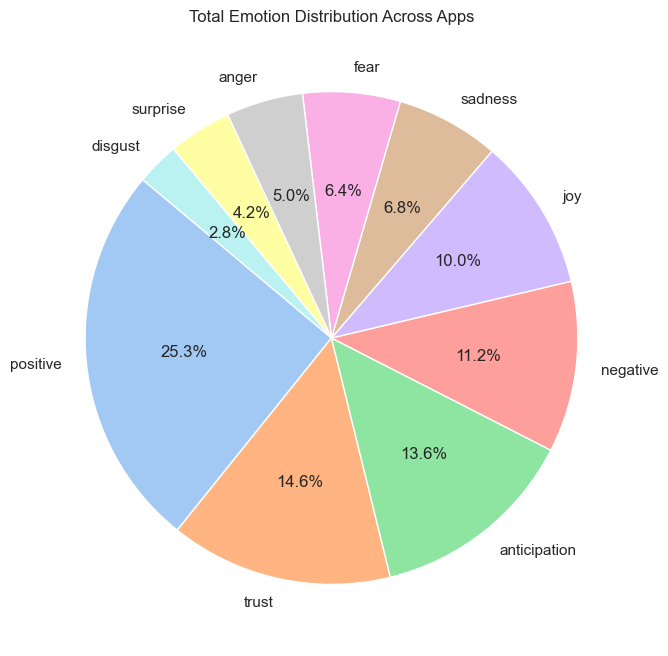

In [97]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_emotion_counts['Count'], labels=total_emotion_counts['Emotion'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Total Emotion Distribution Across Apps')
plt.show()

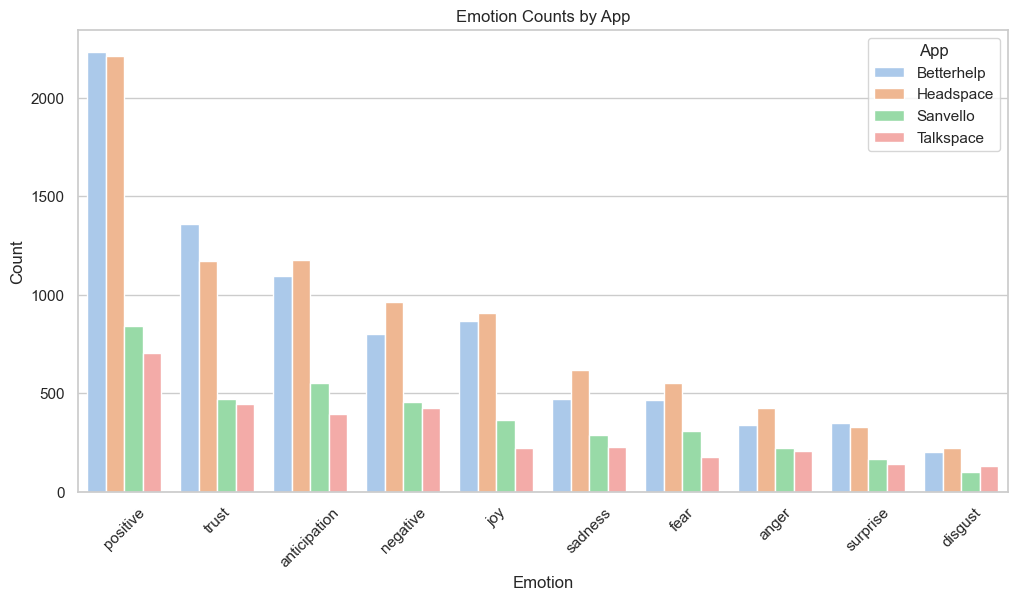

In [96]:
# Set the style of the plot
sns.set(style="whitegrid")

# Define the order of emotions (ranked from most to least)
emotion_order = ['positive', 'trust', 'anticipation', 'negative', 'joy', 'sadness', 'fear', 'anger', 'surprise', 'disgust']

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Emotion', y='Count', hue='app', data=app_emotion_counts_melted_sorted, palette='pastel', order=emotion_order)
plt.title('Emotion Counts by App')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='App', loc='upper right')
plt.show()

In [119]:
combined_df

app                date  \
0    Betterhelp 2022-07-07 02:07:58   
1    Betterhelp 2023-09-14 22:16:29   
2    Betterhelp 2021-05-12 23:57:19   
3    Betterhelp 2021-11-09 15:52:39   
4    Betterhelp 2023-05-22 14:44:35   
5    Betterhelp 2022-09-07 03:59:20   
6    Betterhelp 2020-09-08 15:27:21   
7    Betterhelp 2020-07-19 13:43:18   
8    Betterhelp 2019-10-26 18:42:23   
9    Betterhelp 2022-10-02 19:44:02   
10   Betterhelp 2023-10-09 20:09:19   
11   Betterhelp 2020-07-29 18:11:39   
12   Betterhelp 2020-01-12 16:09:47   
13   Betterhelp 2021-04-16 20:41:59   
14   Betterhelp 2022-11-08 20:49:53   
15   Betterhelp 2023-10-13 18:41:20   
16   Betterhelp 2022-09-30 15:30:55   
17   Betterhelp 2022-05-05 16:29:17   
18   Betterhelp 2023-08-23 21:18:04   
19   Betterhelp 2020-12-07 15:11:36   
20   Betterhelp 2023-03-20 02:19:38   
21   Betterhelp 2022-01-25 21:57:32   
22   Betterhelp 2023-09-12 12:42:53   
23   Betterhelp 2020-10-31 01:57:20   
24   Betterhelp 2020-06-07 14:53:57   
25   Betterhelp 2023-10-03 18:10:17   
26   Betterhelp 2021-01-29 15:31:23   
27   Betterhelp 2021-12-26 22:16:40   
28   Betterhelp 2023-01-20 17:55:16   
29   Betterhelp 2020-04-11 20:28:55   
30   Betterhelp 2018-09-16 18:15:44   
31   Betterhelp 2023-08-15 19:38:46   
32   Betterhelp 2021-07-31 18:13:06   
33   Betterhelp 2022-08-11 20:09:26   
34   Betterhelp 2021-12-17 02:58:35   
35   Betterhelp 2022-01-21 09:50:12   
36   Betterhelp 2021-02-05 02:11:50   
37   Betterhelp 2021-01-26 22:33:40   
38   Betterhelp 2022-05-20 20:03:50   
39   Betterhelp 2023-03-15 02:06:19   
40   Betterhelp 2021-11-05 00:31:30   
41   Betterhelp 2021-06-11 15:27:46   
42   Betterhelp 2022-03-27 15:12:19   
43   Betterhelp 2021-11-13 20:42:55   
44   Betterhelp 2021-12-22 21:31:48   
45   Betterhelp 2019-07-26 03:22:34   
46   Betterhelp 2020-05-28 23:15:18   
47   Betterhelp 2018-10-04 15:02:59   
48   Betterhelp 2020-08-25 18:55:32   
49   Betterhelp 2022-02-01 00:11:12   
50   Betterhelp 2020-06-23 01:03:44   
51   Betterhelp 2022-04-10 01:21:53   
52   Betterhelp 2021-08-12 18:36:56   
53   Betterhelp 2021-06-26 18:08:03   
54   Betterhelp 2020-12-17 13:55:06   
55   Betterhelp 2022-04-10 22:55:46   
56   Betterhelp 2021-02-07 17:09:54   
57   Betterhelp 2023-04-13 00:00:28   
58   Betterhelp 2021-12-03 16:03:58   
59   Betterhelp 2020-05-14 02:02:12   
60   Betterhelp 2021-08-08 02:36:45   
61   Betterhelp 2020-04-09 22:03:05   
62   Betterhelp 2019-08-25 15:13:59   
63   Betterhelp 2020-07-24 07:40:33   
64   Betterhelp 2023-06-07 02:10:02   
65   Betterhelp 2020-03-23 04:43:13   
66   Betterhelp 2022-05-04 21:16:42   
67   Betterhelp 2021-09-10 15:43:56   
68   Betterhelp 2023-08-30 01:06:25   
69   Betterhelp 2023-10-06 11:19:41   
70   Betterhelp 2023-04-19 22:20:22   
71   Betterhelp 2023-10-03 16:09:45   
72   Betterhelp 2020-06-18 17:45:16   
73   Betterhelp 2020-05-09 08:35:12   
74   Betterhelp 2022-12-22 14:48:28   
75   Betterhelp 2022-04-03 20:46:21   
76   Betterhelp 2018-12-01 06:18:32   
77   Betterhelp 2019-10-07 22:59:35   
78   Betterhelp 2021-04-09 02:00:27   
79   Betterhelp 2020-05-29 02:37:16   
80   Betterhelp 2020-03-24 23:06:21   
81   Betterhelp 2023-04-07 13:01:41   
82   Betterhelp 2022-03-26 16:14:18   
83   Betterhelp 2021-09-22 18:17:37   
84   Betterhelp 2021-11-24 18:11:19   
85   Betterhelp 2019-12-09 16:57:09   
86   Betterhelp 2018-07-30 22:07:34   
87   Betterhelp 2020-01-10 01:42:06   
88   Betterhelp 2021-08-18 02:22:08   
89   Betterhelp 2022-09-03 14:06:42   
90   Betterhelp 2023-05-03 01:32:21   
91   Betterhelp 2023-09-21 04:27:33   
92   Betterhelp 2020-03-17 23:01:16   
93   Betterhelp 2023-02-19 16:39:07   
94   Betterhelp 2023-03-29 15:52:24   
95   Betterhelp 2018-04-11 23:33:21   
96   Betterhelp 2020-05-18 02:40:21   
97   Betterhelp 2023-02-24 18:53:06   
98   Betterhelp 2022-12-08 02:30:28   
99   Betterhelp 2021-10-24 18:33:13   
100  Betterhelp 2022-07-16 13:53:46   
101  Betterhelp 2017-12-28 01:43:4

In [118]:
# Set max column width to display full text
pd.set_option('display.max_colwidth', None)

In [110]:
# Save the DataFrame as a CSV file
combined_df.to_excel('mentalhealthappsdata.xlsx', index=False)